In [3]:
### Define functions
# define 4pl model
def log4pl_y(x, A, B, C, D):
    """
    This function defines the 4pl model fit parameters A, B, C and D, in 'y='.
    
    Parameters
    ----------
    x : TYPE float
        Concentration (x value).
    A : TYPE float
        Bottom.
    B : TYPE float
        Slope.
    C : TYPE float
        EC50.
    D : TYPE float
        Top.
    Returns
    -------
    (((A-D)/(1.0+((x/C)**B))) + D) : TYPE float
        output (y value).
        
    """
    return (((A-D)/(1.0+((x/C)**B))) + D)

# calculate 'x' using defined 4pl model
def log4pl_x(y, A, B, C, D):
    """
    This function defines the same 4pl model fit parameters A, B, C and D, in 'x='.
    
    Parameters
    ----------
    y : TYPE float
        Reading (y value).
    A : TYPE float
        Bottom.
    B : TYPE float
        Slope.
    C : TYPE float
        EC50.
    D : TYPE float
        Top.
    Returns
    -------
    (C*((-A + y)/(D - y))**(1/B)) : TYPE float
        Concentration (x value).
        
    """
    return (C*((-A + y)/(D - y))**(1/B))

def serial_dilution(n, factor, start):
    """
    This function create list of concentrations from start and decrease by factor.
    
    Parameters
    ----------
    n : TYPE int
        Number of points.
    factor : TYPE float
        Decreasing factor.
    start : TYPE float
        Starting concentration.
    Returns
    -------
    concs : TYPE list
        A list of concentrations.
        
    """
    if n == 1:   # Terminate recursion
        return start      
    else:
        start = start / factor
        return serial_dilution(n - 1, factor, start)

In [55]:
# prompt user for data input
num_points = 5
serial_factor = 2
start_conc = 1
# calculate concentration series based on user input
concs=[]
for i in range(1, num_points+1):
    concs.append(serial_dilution(i, serial_factor, start_conc))
concs

[1, 0.5, 0.25, 0.125, 0.0625]

In [56]:
import numpy as np
from scipy.optimize import curve_fit #This will do the actual curve fitting
import matplotlib.pyplot as plt
import pandas as pd
import sys
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [57]:
x = concs
y = [9.0, 8.0, 5.0, 2.0, 1.0]
# create dataframe
df_std = pd.DataFrame(data={'concentration':x, 'reference standard results':y})
print("\nResult Summary:")
print(df_std.to_string(index=False))
# variables to store data features and create new x for curve fit
x = df_std['concentration'].tolist()
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)
step = serial_dilution(num_points+4, serial_factor, start_conc)
x_new = np.arange(x_min, x_max, step)



### Calculate

# curve fit
try:
    params, _ = curve_fit(log4pl_y, x, y)
except RuntimeError:
    print("\nRuntimeError!\n***4PL model cannot fit into data***\n")
    # plot result
    plt.plot(x, y, 'bo',label="Reference Standard")
    plt.title('Result')
    plt.xlabel('Concentration')
    plt.ylabel('Reading')
    plt.xscale("log")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.savefig('log4pl_plot.png')
    plt.show()
    sys.exit()
    
# get and show the parameters    
A,B,C,D = params[0], params[1], params[2], params[3]
print("\n4PL parameters: A = " + str(round(A,4)) + 
      ", B = " + str(round(B,4)) + 
      ", C = " + str(round(C,4)) + 
      ", D = " + str(round(D,4))) 

# Calculate and print the R-squared value
residuals = y - log4pl_y(x, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", round(r_squared, 4), '\n')


Result Summary:
 concentration  reference standard results
        1.0000                         9.0
        0.5000                         8.0
        0.2500                         5.0
        0.1250                         2.0
        0.0625                         1.0

4PL parameters: A = 0.7574, B = 2.5431, C = 0.25, D = 9.2426
R-squared value: 1.0 



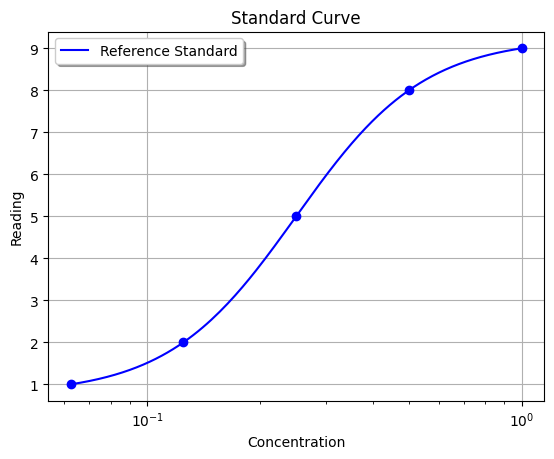

In [58]:
# calculate points to plot curve fit result
yfit1 = log4pl_y(x_new, *params)

# Plot reference standard results and curve fit
plt.plot(x, y, 'bo')
plt.plot(x_new, yfit1, 'blue',label="Reference Standard")
plt.title('Standard Curve')
plt.xlabel('Concentration')
plt.ylabel('Reading')
plt.xscale("log")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.savefig('log4pl_plot.png')
plt.show()